In [2]:
import os
import numpy as np

import cv2
import matplotlib.pylab as plt

import tensorflow as tf

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
train_dir = 'imgdata_v2/split_dataset/train/'
val_dir = 'imgdata_v2/split_dataset/val/'
test_dir = 'imgdata_v2/split_dataset/test/'

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                             brightness_range=(0.1, 1.5),
                             horizontal_flip=True,
                             vertical_flip=True,
                             fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_dir,
                                                   batch_size=16, 
                                                   target_size=(256,256),
                                                   class_mode='binary')

Found 1456 images belonging to 2 classes.


In [9]:
val_datagen = ImageDataGenerator(rescale=1./255)

val_generator = val_datagen.flow_from_directory(val_dir,
                                                batch_size=16,
                                                target_size=(256, 256),
                                                class_mode='binary')

Found 415 images belonging to 2 classes.


In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                batch_size=16,
                                                target_size=(256, 256),
                                                class_mode='binary')

Found 210 images belonging to 2 classes.


In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Dropout(0.4))

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.5))

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Dropout(0.3))

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', pre, rec, spe])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 127, 127, 16)     0         
 g2D)                                                            
                                                                 
 dropout_24 (Dropout)        (None, 127, 127, 16)      0         
                                                                 
 conv2d_19 (Conv2D)          (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 62, 62, 32)       0         
 g2D)                                                            
                                                                 
 dropout_25 (Dropout)        (None, 62, 62, 32)       

In [62]:
logdir = 'LogDir'

try:
    os.mkdir(logdir)
except Exception as e:
    pass    

tfb_callback = tf.keras.callbacks.TensorBoard(logdir)

In [70]:
model_fit = model.fit(train_generator, 
                      epochs=30, 
                      shuffle=True, 
                      validation_data=val_generator, 
                      callbacks=[tfb_callback])

Epoch 1/30
91/91 [==============================] - 7s 62ms/step - loss: 0.9280 - accuracy: 0.5488 - precision_5: 0.6473 - recall_5: 0.5070 - specificity_at_sensitivity_5: 0.6436 - val_loss: 0.6779 - val_accuracy: 0.5157 - val_precision_5: 0.5157 - val_recall_5: 1.0000 - val_specificity_at_sensitivity_5: 0.8856
Epoch 2/30
91/91 [==============================] - 5s 59ms/step - loss: 0.5399 - accuracy: 0.7521 - precision_5: 0.7213 - recall_5: 0.8453 - specificity_at_sensitivity_5: 0.9008 - val_loss: 0.6071 - val_accuracy: 0.5277 - val_precision_5: 0.5220 - val_recall_5: 1.0000 - val_specificity_at_sensitivity_5: 0.9552
Epoch 3/30
91/91 [==============================] - 5s 58ms/step - loss: 0.4337 - accuracy: 0.8269 - precision_5: 0.8144 - recall_5: 0.8600 - specificity_at_sensitivity_5: 0.9249 - val_loss: 0.4966 - val_accuracy: 0.7639 - val_precision_5: 0.6871 - val_recall_5: 0.9953 - val_specificity_at_sensitivity_5: 0.9602
Epoch 4/30
91/91 [==============================] - 5s 59ms/s

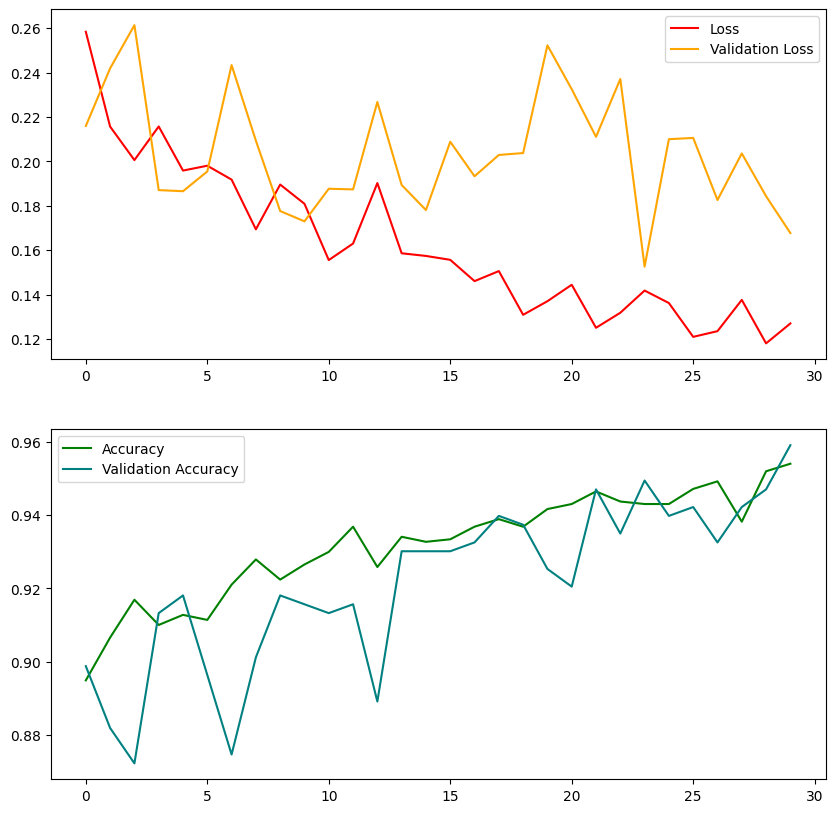

In [67]:
fig, axs = plt.subplots(2, 1, figsize=(10,10))
axs[0].plot(model_fit.history['loss'], color='red', label='Loss')
axs[0].plot(model_fit.history['val_loss'], color='orange', label='Validation Loss')
axs[0].legend(loc='upper right')

axs[1].plot(model_fit.history['accuracy'], 
             color='green', 
             label='Accuracy')
axs[1].plot(model_fit.history['val_accuracy'], 
             color='teal', 
             label='Validation Accuracy')
axs[1].legend(loc='upper left')

In [58]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, SpecificityAtSensitivity

pre = Precision()
acc = BinaryAccuracy()
rec = Recall()
spe = SpecificityAtSensitivity(0.5)

In [68]:
# The 'evaluation' variable now contains the calculated metrics
evaluation = model.evaluate(test_generator, verbose=1)

accuracy = evaluation[1]  # 'accuracy'
precision = evaluation[2]  # Precision
recall = evaluation[3]     # Recall
specificity = evaluation[4]  # SpecificityAtSensitivity(0.5)

# Print the evaluation results
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'Specificity (at sensitivity 0.5): {specificity}')

14/14 [==============================] - 1s 29ms/step - loss: 0.0677 - accuracy: 0.9857 - precision_5: 0.9817 - recall_5: 0.9907 - specificity_at_sensitivity_5: 1.0000
Accuracy: 0.9857142567634583
Precision: 0.9816513657569885
Recall: 0.9907407164573669
Specificity (at sensitivity 0.5): 1.0
